In [1]:
# -*- coding: utf-8 -*-
# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: light
#       format_version: '1.5'
#       jupytext_version: 1.16.1
#   kernelspec:
#     display_name: Python 3 (ipykernel)
#     language: python
#     name: python3
# ---

# # LangGraph Decision Engine Examples
#
# This notebook demonstrates how to use the `langgraph_decision_engine` module to build, visualize, and run decision graphs.
#
# **Context:** Executed on Friday, April 11, 2025 at 10:25:51 PM CEST in Munich, Bavaria, Germany.
#
# **Setup:**
# 1.  **Module:** Make sure the file `langgraph_decision_engine.py` is in the same directory as this notebook, or in your Python path.
# 2.  **Environment Variables:** Create a `.env` file in this directory or set environment variables globally for:
#     * `LLM_API_TYPE`: "TGI" or "OPENAI"
#     * `LLM_MODEL_NAME`: e.g., "mistralai/Mistral-7B-Instruct-v0.1" or "gpt-4o-mini"
#     * `OPENAI_API_KEY`: Required if `LLM_API_TYPE="OPENAI"`
#     * `TGI_API_BASE_URL`: Required if `LLM_API_TYPE="TGI"` (e.g., "http://localhost:8080/v1")
#     * `TGI_API_KEY`: Optional for TGI (defaults to "no-key-needed")
# 3.  **Core Dependencies:** Install required packages:
#     ```bash
#     pip install langgraph langchain-openai python-dotenv
#     ```
# 4.  **Visualization Dependencies:** For direct graph rendering in the notebook, install **one** of the following backends:
#     * **Method A: pygraphviz**
#         ```bash
#         # System install (example for Debian/Ubuntu)
#         # sudo apt-get update && sudo apt-get install graphviz -y
#         # OR (example for macOS)
#         # brew install graphviz
#
#         # Python package install
#         pip install pygraphviz
#         ```
#     * **Method B: playwright**
#         ```bash
#         pip install playwright
#         playwright install
#         ```

In [2]:
reinstall = False
if reinstall:
    !pip install langgraph langchain-openai typing_extensions httpx python-dotenv playwright
    !playwright install

## Setup Environmental Variables and LLM Access:

In [3]:
# Load the autoreload extension
%load_ext autoreload
# Set autoreload mode to reload all modules before executing code
%autoreload 2

In [4]:
import os
from dotenv import load_dotenv

In [5]:
# Function to get OpenAI key from file:
def getkey(keyfile, dir_keys, default_envar=None):
    try:
        with open(os.path.join(dir_keys, keyfile + '.key'), 'r') as f:
            lines = f.readlines()
            for line in lines:
                if len(line.strip()) > 0:
                    envvar, value = line.split(':')
                    value = value.strip()
                    os.environ[envvar] = value
    except:
        envvar = default_envar
        os.environ[envvar] = ""

In [6]:
home = os.environ["HOME"]
dir_keys = home + '/keys'
getkey("openai", dir_keys, default_envar="OPENAI_API_KEY")


### 1. Imports and Module Loading

In [7]:
# +
import json
import warnings
import pandas as pd

# Import the custom modules
import langgraph_decision_engine as lde
import example_graphs as exg

# Required for direct display in Jupyter
from IPython.display import Image, display, Markdown

# Check if core LLM config seems present (basic check)
print(f"Using LLM_API_TYPE: {lde.LLM_API_TYPE}")
if not lde.LLM_MODEL_NAME:
    warnings.warn("LLM_MODEL_NAME environment variable is not set in the environment/`.env` file.", stacklevel=2)
if lde.LLM_API_TYPE == "OPENAI" and not lde.OPENAI_API_KEY:
    warnings.warn("LLM_API_TYPE is 'OPENAI' but OPENAI_API_KEY is not set.", stacklevel=2)
if lde.LLM_API_TYPE == "TGI" and not lde.TGI_API_BASE_URL:
     warnings.warn("LLM_API_TYPE is 'TGI' but TGI_API_BASE_URL is not set.", stacklevel=2)
# -

Using LLM_API_TYPE: OPENAI


### 2. Build and Visualize Graphs

#### 2.1 Example Graph with Logic Gate (AND)


Compiled graph from example module: 'build_and_gate_example_graph'

Attempting to render 'and_gate_example_graph' visualization...
Trying pygraphviz...
Trying playwright...


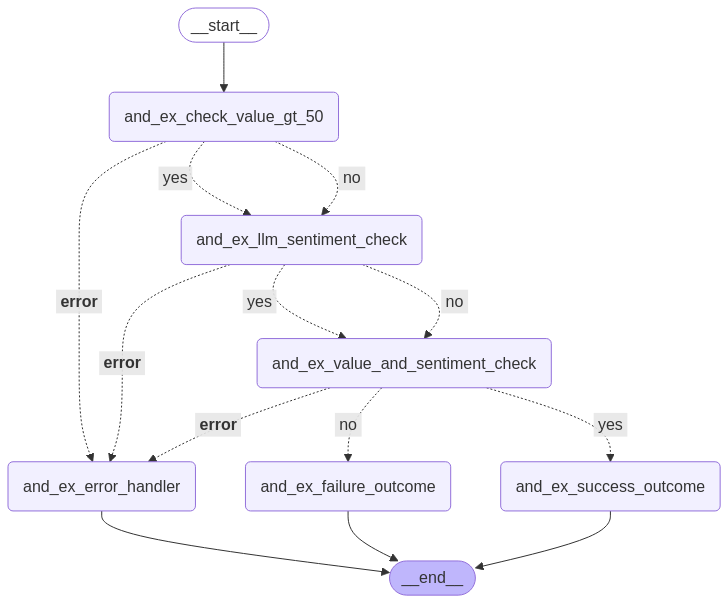

Rendered with playwright.


In [8]:
# +
import warnings # Make sure warnings is imported if not done globally
from IPython.display import Image, display, Markdown # Ensure these are imported

# Compile the graph using the builder function from the module
# Assign to app_and_gate
app_and_gate = exg.build_and_gate_example_graph()

# Attempt to visualize directly in the notebook
# Use the correct variable name 'app_and_gate' below
print("\nAttempting to render 'and_gate_example_graph' visualization...")
try:
    # Try pygraphviz first
    print("Trying pygraphviz...")
    # Use app_and_gate here
    png_data = app_and_gate.get_graph().draw_png()
    display(Image(png_data))
    print("Rendered with pygraphviz.")
except ImportError:
    warnings.warn("pygraphviz not found. Trying playwright...", ImportWarning, stacklevel=2)
    try:
        # Try playwright/mermaid as fallback
        print("Trying playwright...")
         # Use app_and_gate here
        png_data = app_and_gate.get_graph().draw_mermaid_png()
        display(Image(png_data))
        print("Rendered with playwright.")
    except Exception as e_mermaid:
        warnings.warn(f"Failed to render with playwright: {e_mermaid}\n"
                      "Install prerequisites (pygraphviz+Graphviz OR playwright) for direct visualization.",
                      stacklevel=2)
        print("\n--- Mermaid Syntax (Fallback) ---")
        try:
            # Use app_and_gate here
            mermaid_syntax = app_and_gate.get_graph().draw_mermaid()
            display(Markdown(f"```mermaid\n{mermaid_syntax}\n```"))
        except Exception as e_syntax:
            print(f"Could not generate Mermaid syntax: {e_syntax}")

except Exception as e_pgv:
     warnings.warn(f"Failed to render with pygraphviz: {e_pgv}\n"
                   "Ensure Graphviz system library is installed and pygraphviz Python package.",
                   stacklevel=2)
     # Optionally try playwright or mermaid syntax as fallback here too if desired
     print("\n--- Mermaid Syntax (Fallback) ---")
     try:
        # Use app_and_gate here
        mermaid_syntax = app_and_gate.get_graph().draw_mermaid()
        display(Markdown(f"```mermaid\n{mermaid_syntax}\n```"))
     except Exception as e_syntax:
        print(f"Could not generate Mermaid syntax: {e_syntax}")

# -

#### 2.2 Simple Sequential Graph


Compiled graph from example module: 'build_simple_sequential_graph'

Attempting to render 'simple_sequential_graph' visualization...
Trying pygraphviz...
Trying playwright...


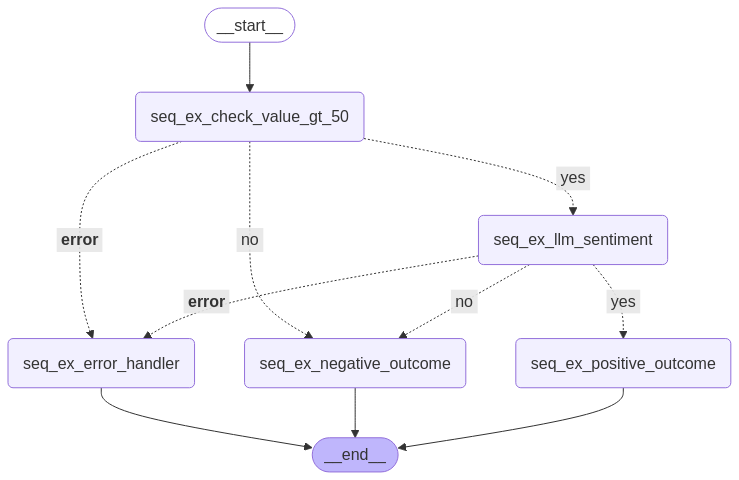

Rendered with playwright.


In [9]:
# +
# Compile the second example graph
app_simple_sequential = exg.build_simple_sequential_graph()

# Attempt to visualize directly in the notebook
print("\nAttempting to render 'simple_sequential_graph' visualization...")
try:
    print("Trying pygraphviz...")
    png_data = app_simple_sequential.get_graph().draw_png()
    display(Image(png_data))
    print("Rendered with pygraphviz.")
except ImportError:
    warnings.warn("pygraphviz not found. Trying playwright...", ImportWarning, stacklevel=2)
    try:
        print("Trying playwright...")
        png_data = app_simple_sequential.get_graph().draw_mermaid_png()
        display(Image(png_data))
        print("Rendered with playwright.")
    except Exception as e_mermaid:
        warnings.warn(f"Failed to render with playwright: {e_mermaid}\n"
                      "Install prerequisites for direct visualization.",
                      stacklevel=2)
        print("\n--- Mermaid Syntax (Fallback) ---")
        try:
            mermaid_syntax = app_simple_sequential.get_graph().draw_mermaid()
            display(Markdown(f"```mermaid\n{mermaid_syntax}\n```"))
        except Exception as e_syntax:
            print(f"Could not generate Mermaid syntax: {e_syntax}")

except Exception as e_pgv:
     warnings.warn(f"Failed to render with pygraphviz: {e_pgv}\n"
                   "Ensure Graphviz system library is installed and pygraphviz Python package.",
                   stacklevel=2)
     print("\n--- Mermaid Syntax (Fallback) ---")
     try:
        mermaid_syntax = app_simple_sequential.get_graph().draw_mermaid()
        display(Markdown(f"```mermaid\n{mermaid_syntax}\n```"))
     except Exception as e_syntax:
        print(f"Could not generate Mermaid syntax: {e_syntax}")
# -

In [21]:
print (f"```mermaid\n{mermaid_syntax}\n```")

```mermaid
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	wp_check_is_english(wp_check_is_english)
	wp_llm_check_word_in_para(wp_llm_check_word_in_para)
	wp_check_number_in_para(wp_check_number_in_para)
	wp_gate_word_or_number(wp_gate_word_or_number)
	wp_llm_check_is_poem(wp_llm_check_is_poem)
	wp_gate_or_and_poem(wp_gate_or_and_poem)
	wp_terminal_meets_condition(wp_terminal_meets_condition)
	wp_terminal_does_not_meet_condition(wp_terminal_does_not_meet_condition)
	wp_error_handler_complex(wp_error_handler_complex)
	__end__([<p>__end__</p>]):::last
	__start__ --> wp_check_is_english;
	wp_error_handler_complex --> __end__;
	wp_terminal_does_not_meet_condition --> __end__;
	wp_terminal_meets_condition --> __end__;
	wp_check_is_english -. &nbsp;yes&nbsp; .-> wp_terminal_does_not_meet_condition;
	wp_check_is_english -. &nbsp;no&nbsp; .-> wp_llm_check_word_in_para;
	wp_check_is_english -. &nbsp;__error__&nbsp; .-> wp_error_handler_complex;
	

### 3. Run Graph Examples

#### 3.1 Logic Gate Graph Examples

In [10]:
# +
# Example 1: Expect Success (Value > 50 AND Sentiment Positive)
print("\n--- Running Logic Gate Example 1 (Expect Success) ---")
inputs_lg_1 = {
    "input_data": {"value": 75, "user_text": "Absolutely fantastic service!"},
    "intermediate_results": {} # Start with empty intermediate results
}
try:
    result_lg_1 = app_and_gate.invoke(inputs_lg_1)
    print("\nFinal State (Logic Gate Example 1):")
    print(json.dumps(result_lg_1, indent=2))
    assert result_lg_1.get('intermediate_results', {}).get('final_outcome') == "Success: Value > 50 AND Sentiment Positive"
except Exception as e:
    print(f"Invocation failed: {e}")


--- Running Logic Gate Example 1 (Expect Success) ---
--- Running Node (Simple): and_ex_check_value_gt_50 ---
--- Reached Terminal Node: and_ex_success_outcome (Success: Value > 50 AND Sentiment Positive) ---

Final State (Logic Gate Example 1):
{
  "input_data": {
    "value": 75,
    "user_text": "Absolutely fantastic service!"
  },
  "decision_result": null,
  "intermediate_results": {
    "and_ex_check_value_gt_50_result": true,
    "and_ex_llm_sentiment_check_result": true,
    "and_ex_value_and_sentiment_check_result": true,
    "final_outcome": "Success: Value > 50 AND Sentiment Positive"
  },
  "error": null,
  "current_node": "and_ex_success_outcome"
}


In [11]:
# +
# Example 2: Expect Failure (Value <= 50)
print("\n--- Running Logic Gate Example 2 (Expect Failure - Value Low) ---")
inputs_lg_2 = {
    "input_data": {"value": 30, "user_text": "Absolutely fantastic service!"},
    "intermediate_results": {}
}
try:
    result_lg_2 = app_and_gate.invoke(inputs_lg_2)
    print("\nFinal State (Logic Gate Example 2):")
    print(json.dumps(result_lg_2, indent=2))
    assert result_lg_2.get('intermediate_results', {}).get('final_outcome') == "Failure: Condition (Value > 50 AND Sentiment Positive) not met"
except Exception as e:
    print(f"Invocation failed: {e}")


--- Running Logic Gate Example 2 (Expect Failure - Value Low) ---
--- Running Node (Simple): and_ex_check_value_gt_50 ---
--- Reached Terminal Node: and_ex_failure_outcome (Failure: Condition (Value > 50 AND Sentiment Positive) not met) ---

Final State (Logic Gate Example 2):
{
  "input_data": {
    "value": 30,
    "user_text": "Absolutely fantastic service!"
  },
  "decision_result": null,
  "intermediate_results": {
    "and_ex_check_value_gt_50_result": false,
    "and_ex_llm_sentiment_check_result": true,
    "and_ex_value_and_sentiment_check_result": false,
    "final_outcome": "Failure: Condition (Value > 50 AND Sentiment Positive) not met"
  },
  "error": null,
  "current_node": "and_ex_failure_outcome"
}


In [12]:
# +
# Example 3: Expect Failure (Sentiment Negative)
print("\n--- Running Logic Gate Example 3 (Expect Failure - Sentiment Negative) ---")
inputs_lg_3 = {
    "input_data": {"value": 90, "user_text": "This is really quite bad."},
    "intermediate_results": {}
}
try:
    result_lg_3 = app_and_gate.invoke(inputs_lg_3)
    print("\nFinal State (Logic Gate Example 3):")
    print(json.dumps(result_lg_3, indent=2))
    assert result_lg_3.get('intermediate_results', {}).get('final_outcome') == "Failure: Condition (Value > 50 AND Sentiment Positive) not met"
except Exception as e:
    print(f"Invocation failed: {e}")


--- Running Logic Gate Example 3 (Expect Failure - Sentiment Negative) ---
--- Running Node (Simple): and_ex_check_value_gt_50 ---
--- Reached Terminal Node: and_ex_failure_outcome (Failure: Condition (Value > 50 AND Sentiment Positive) not met) ---

Final State (Logic Gate Example 3):
{
  "input_data": {
    "value": 90,
    "user_text": "This is really quite bad."
  },
  "decision_result": null,
  "intermediate_results": {
    "and_ex_check_value_gt_50_result": true,
    "and_ex_llm_sentiment_check_result": false,
    "and_ex_value_and_sentiment_check_result": false,
    "final_outcome": "Failure: Condition (Value > 50 AND Sentiment Positive) not met"
  },
  "error": null,
  "current_node": "and_ex_failure_outcome"
}


In [13]:
# +
# Example 4: Simulate missing input for Gate node (should error)
print("\n--- Running Logic Gate Example 4 (Expect Error - Missing Gate Input) ---")
# Manually create state after first node, but before second, then invoke AND gate directly (for testing)
# This requires more advanced graph manipulation or checking intermediate state,
# simpler to just trigger an error in a node like the LLM call if API is misconfigured.

# Let's trigger potential LLM error instead by providing incomplete input data for the prompt
inputs_lg_4 = {
    "input_data": {"value": 90}, # Missing 'user_text' for the sentiment prompt
    "intermediate_results": {}
}
try:
    print("Note: This might fail inside the LLM node or routing depending on error handling.")
    result_lg_4 = app_and_gate.invoke(inputs_lg_4)
    print("\nFinal State (Logic Gate Example 4):")
    print(json.dumps(result_lg_4, indent=2))
    # We expect this to end up in the 'error_handler' node
    assert result_lg_4.get('intermediate_results', {}).get('final_outcome') == "Process Failed"
except Exception as e:
    # Langchain might raise exceptions on missing prompt keys
    print(f"Invocation potentially failed as expected: {e}")
    print("Check logs above - it should ideally reach the error_handler node via routing.")


# -


--- Running Logic Gate Example 4 (Expect Error - Missing Gate Input) ---
Note: This might fail inside the LLM node or routing depending on error handling.
--- Running Node (Simple): and_ex_check_value_gt_50 ---
Error: Missing key ''user_text'' in input_data for prompt formatting in and_ex_llm_sentiment_check.
Routing to error handler due to error: Missing data for prompt: 'user_text'
--- Reached Terminal Node: and_ex_error_handler (Process Failed (AND Example)) ---

Final State (Logic Gate Example 4):
{
  "input_data": {
    "value": 90
  },
  "decision_result": null,
  "intermediate_results": {
    "and_ex_check_value_gt_50_result": true,
    "and_ex_llm_sentiment_check_result": false,
    "final_outcome": "Process Failed (AND Example)"
  },
  "error": null,
  "current_node": "and_ex_error_handler"
}
Invocation potentially failed as expected: 
Check logs above - it should ideally reach the error_handler node via routing.


#### 3.2 Simple Sequential Graph Examples

In [14]:
# +
# Example 1: Expect Positive Path (Value > 50, Sentiment Positive)
print("\n--- Running Simple Sequential Example 1 (Expect Positive) ---")
inputs_ss_1 = {
    "input_data": {"value": 60, "user_text": "This is great!"},
    "intermediate_results": {}
}
try:
    result_ss_1 = app_simple_sequential.invoke(inputs_ss_1)
    print("\nFinal State (Simple Sequential Example 1):")
    print(json.dumps(result_ss_1, indent=2))
    assert result_ss_1.get('intermediate_results', {}).get('final_outcome') == "Positive Path Outcome"
except Exception as e:
    print(f"Invocation failed: {e}")


--- Running Simple Sequential Example 1 (Expect Positive) ---
--- Running Node (Simple): seq_ex_check_value_gt_50 ---
--- Reached Terminal Node: seq_ex_positive_outcome (Positive Path Outcome) ---

Final State (Simple Sequential Example 1):
{
  "input_data": {
    "value": 60,
    "user_text": "This is great!"
  },
  "decision_result": null,
  "intermediate_results": {
    "seq_ex_check_value_gt_50_result": true,
    "seq_ex_llm_sentiment_result": true,
    "final_outcome": "Positive Path Outcome"
  },
  "error": null,
  "current_node": "seq_ex_positive_outcome"
}


In [15]:
# +
# Example 2: Expect Negative Path (Value <= 50)
print("\n--- Running Simple Sequential Example 2 (Expect Negative - Low Value) ---")
inputs_ss_2 = {
    "input_data": {"value": 40, "user_text": "This is great!"},
    "intermediate_results": {}
}
try:
    result_ss_2 = app_simple_sequential.invoke(inputs_ss_2)
    print("\nFinal State (Simple Sequential Example 2):")
    print(json.dumps(result_ss_2, indent=2))
    assert result_ss_2.get('intermediate_results', {}).get('final_outcome') == "Negative Path Outcome"
except Exception as e:
    print(f"Invocation failed: {e}")


--- Running Simple Sequential Example 2 (Expect Negative - Low Value) ---
--- Running Node (Simple): seq_ex_check_value_gt_50 ---
--- Reached Terminal Node: seq_ex_negative_outcome (Negative Path Outcome) ---

Final State (Simple Sequential Example 2):
{
  "input_data": {
    "value": 40,
    "user_text": "This is great!"
  },
  "decision_result": null,
  "intermediate_results": {
    "seq_ex_check_value_gt_50_result": false,
    "final_outcome": "Negative Path Outcome"
  },
  "error": null,
  "current_node": "seq_ex_negative_outcome"
}


In [16]:
# +
# Example 3: Expect Negative Path (Value > 50, Sentiment Negative)
print("\n--- Running Simple Sequential Example 3 (Expect Negative - Bad Sentiment) ---")
inputs_ss_3 = {
    "input_data": {"value": 70, "user_text": "This is bad."},
    "intermediate_results": {}
}
try:
    result_ss_3 = app_simple_sequential.invoke(inputs_ss_3)
    print("\nFinal State (Simple Sequential Example 3):")
    print(json.dumps(result_ss_3, indent=2))
    assert result_ss_3.get('intermediate_results', {}).get('final_outcome') == "Negative Path Outcome"
except Exception as e:
    print(f"Invocation failed: {e}")

# -

# ---

# End of Notebook


--- Running Simple Sequential Example 3 (Expect Negative - Bad Sentiment) ---
--- Running Node (Simple): seq_ex_check_value_gt_50 ---
--- Reached Terminal Node: seq_ex_negative_outcome (Negative Path Outcome) ---

Final State (Simple Sequential Example 3):
{
  "input_data": {
    "value": 70,
    "user_text": "This is bad."
  },
  "decision_result": null,
  "intermediate_results": {
    "seq_ex_check_value_gt_50_result": true,
    "seq_ex_llm_sentiment_result": false,
    "final_outcome": "Negative Path Outcome"
  },
  "error": null,
  "current_node": "seq_ex_negative_outcome"
}


### Some Setup for a more complex Example:


Compiled graph from example module: 'build_word_poetry_graph'

Attempting to render 'word_poetry_graph' visualization...
Trying pygraphviz...
Trying playwright...


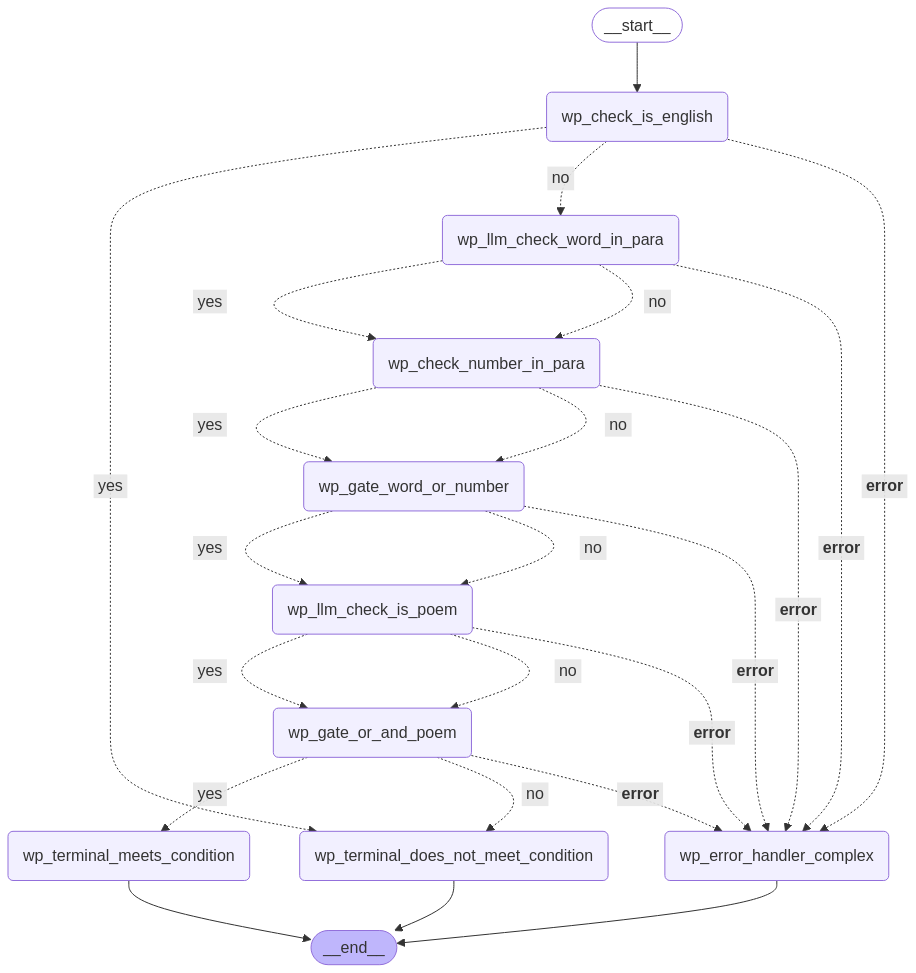

Rendered with playwright.


```mermaid
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	wp_check_is_english(wp_check_is_english)
	wp_llm_check_word_in_para(wp_llm_check_word_in_para)
	wp_check_number_in_para(wp_check_number_in_para)
	wp_gate_word_or_number(wp_gate_word_or_number)
	wp_llm_check_is_poem(wp_llm_check_is_poem)
	wp_gate_or_and_poem(wp_gate_or_and_poem)
	wp_terminal_meets_condition(wp_terminal_meets_condition)
	wp_terminal_does_not_meet_condition(wp_terminal_does_not_meet_condition)
	wp_error_handler_complex(wp_error_handler_complex)
	__end__([<p>__end__</p>]):::last
	__start__ --> wp_check_is_english;
	wp_error_handler_complex --> __end__;
	wp_terminal_does_not_meet_condition --> __end__;
	wp_terminal_meets_condition --> __end__;
	wp_check_is_english -. &nbsp;yes&nbsp; .-> wp_terminal_does_not_meet_condition;
	wp_check_is_english -. &nbsp;no&nbsp; .-> wp_llm_check_word_in_para;
	wp_check_is_english -. &nbsp;__error__&nbsp; .-> wp_error_handler_complex;
	wp_llm_check_word_in_para -. &nbsp;yes&nbsp; .-> wp_check_number_in_para;
	wp_llm_check_word_in_para -. &nbsp;no&nbsp; .-> wp_check_number_in_para;
	wp_llm_check_word_in_para -. &nbsp;__error__&nbsp; .-> wp_error_handler_complex;
	wp_check_number_in_para -. &nbsp;yes&nbsp; .-> wp_gate_word_or_number;
	wp_check_number_in_para -. &nbsp;no&nbsp; .-> wp_gate_word_or_number;
	wp_check_number_in_para -. &nbsp;__error__&nbsp; .-> wp_error_handler_complex;
	wp_gate_word_or_number -. &nbsp;yes&nbsp; .-> wp_llm_check_is_poem;
	wp_gate_word_or_number -. &nbsp;no&nbsp; .-> wp_llm_check_is_poem;
	wp_gate_word_or_number -. &nbsp;__error__&nbsp; .-> wp_error_handler_complex;
	wp_llm_check_is_poem -. &nbsp;yes&nbsp; .-> wp_gate_or_and_poem;
	wp_llm_check_is_poem -. &nbsp;no&nbsp; .-> wp_gate_or_and_poem;
	wp_llm_check_is_poem -. &nbsp;__error__&nbsp; .-> wp_error_handler_complex;
	wp_gate_or_and_poem -. &nbsp;yes&nbsp; .-> wp_terminal_meets_condition;
	wp_gate_or_and_poem -. &nbsp;no&nbsp; .-> wp_terminal_does_not_meet_condition;
	wp_gate_or_and_poem -. &nbsp;__error__&nbsp; .-> wp_error_handler_complex;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

```

In [17]:

# ## 2. Build and Visualize Graphs

# ### 2.2 Complex Word/Poetry Graph (from Example Module)

# +
# Define seed words needed by this specific graph builder
seed_words_for_graph = ["sky", "ocean", "tree", "fire", "stone"]

# Compile the graph using the builder function from the EXAMPLE module
# Pass the required seed_words argument
app_complex = exg.build_word_poetry_graph(seed_words=seed_words_for_graph)

# Attempt to visualize directly (same code as before, just using app_complex)
print("\nAttempting to render 'word_poetry_graph' visualization...")
# ... (Paste the visualization try/except block from the previous notebook version here, using app_complex) ...
try:
    print("Trying pygraphviz..."); png_data = app_complex.get_graph().draw_png(); display(Image(png_data)); print("Rendered with pygraphviz.")
except ImportError:
    warnings.warn("pygraphviz not found. Trying playwright...", ImportWarning, stacklevel=2)
    try: print("Trying playwright..."); png_data = app_complex.get_graph().draw_mermaid_png(); display(Image(png_data)); print("Rendered with playwright.")
    except Exception as e_mermaid: warnings.warn(f"Failed to render with playwright: {e_mermaid}\nInstall prerequisites.", stacklevel=2); print("\n--- Mermaid Syntax (Fallback) ---")
    try: mermaid_syntax = app_complex.get_graph().draw_mermaid(); display(Markdown(f"```mermaid\n{mermaid_syntax}\n```"))
    except Exception as e_syntax: print(f"Could not generate Mermaid syntax: {e_syntax}")
except Exception as e_pgv:
     warnings.warn(f"Failed to render with pygraphviz: {e_pgv}\nEnsure Graphviz system library and pygraphviz package.", stacklevel=2); print("\n--- Mermaid Syntax (Fallback) ---")
     try: mermaid_syntax = app_complex.get_graph().draw_mermaid(); display(Markdown(f"```mermaid\n{mermaid_syntax}\n```"))
     except Exception as e_syntax: print(f"Could not generate Mermaid syntax: {e_syntax}")
# -


### 4. Run Complex Logic Graph Examples

#### 4.1 Define Sample Data for Complex Graph§m

In [18]:
# +
# Define seed words (can be same as used for building, or different if logic allows)
run_seed_words = ["sky", "ocean", "tree", "fire", "stone"]
run_seed_words_str = ", ".join(run_seed_words) # For use in prompts

# Manually create sample paragraphs (same data as before)
sample_paragraphs = [
    # ... (Paste the sample_paragraphs list definition from the previous notebook version here) ...
    {'id': 1, 'language': 'de', 'text': "Der alte Baum,\nStreckt knorrige Äste zum Himmel,\nEin grünes Dach,\nWo Vögel singen im Sommerwind.\nStandhaft gegen Feuer und Stein.", 'true_properties': {'is_english': False, 'has_word': True, 'has_number': False, 'is_poem': True}},
    {'id': 2, 'language': 'en', 'text': "Blue sky above,\nOcean whispers on the shore,\nA solitary tree stands tall,\nReflecting fire in its leaves of fall.", 'true_properties': {'is_english': True, 'has_word': True, 'has_number': False, 'is_poem': True}},
    {'id': 3, 'language': 'fr', 'text': "Le ciel était d'un bleu intense hier. Nous avons compté 3 oiseaux près de l'océan. L'arbre près de la maison est très vieux.", 'true_properties': {'is_english': False, 'has_word': True, 'has_number': True, 'is_poem': False}},
    {'id': 4, 'language': 'es', 'text': "Cinco piedras lisas,\nRecogidas junto al mar,\nBajo el vasto cielo.\nMemorias del fuego,\nQue el árbol recuerda. Cuenta hasta 5.", 'true_properties': {'is_english': False, 'has_word': False, 'has_number': True, 'is_poem': True}},
    {'id': 5, 'language': 'en', 'text': "The weather forecast predicts sunshine for the next three days. It's a good time for a walk.", 'true_properties': {'is_english': True, 'has_word': False, 'has_number': False, 'is_poem': False}},
    {'id': 6, 'language': 'de', 'text': "Das Auto fuhr schnell die leere Straße entlang. Die Sonne schien hell. Es war ein ruhiger Nachmittag.", 'true_properties': {'is_english': False, 'has_word': False, 'has_number': False, 'is_poem': False}},
    {'id': 7, 'language': 'fr', 'text': "Il y a 2 chats sur le toit. Le voisin a planté un nouvel arbre. Le feu dans la cheminée crépite.", 'true_properties': {'is_english': False, 'has_word': True, 'has_number': True, 'is_poem': False}},
    {'id': 8, 'language': 'es', 'text': "En el año 1492,\nColón cruzó el océano azul.\nEl cielo testigo,\nFuego en la mirada,\nBuscando el nuevo mundo.", 'true_properties': {'is_english': False, 'has_word': False, 'has_number': True, 'is_poem': True}},
    {'id': 9, 'language': 'de', 'text': "Stille Nacht,\nHeilige Nacht,\nAlles schläft,\nEinsam wacht.", 'true_properties': {'is_english': False, 'has_word': False, 'has_number': False, 'is_poem': True}},
    {'id': 10, 'language': 'fr', 'text': "Sous le ciel étoile,\nLa pierre froide repose,\nL'océan murmure,\nLe feu danse dans la nuit,\nComme un arbre en prière.", 'true_properties': {'is_english': False, 'has_word': True, 'has_number': False, 'is_poem': True}},
]

#### 4.2 Run Paragraphs Through the Complex Graph and Collect Results

In [19]:
# +
# Process each sample paragraph using the app_complex graph
collected_results = [] # Initialize list to store results for DataFrame
node_prefix = "wp_" # Prefix used in the build_word_poetry_graph node names

for i, sample in enumerate(sample_paragraphs):
    # Less verbose print during loop
    print(f"Processing Paragraph {sample['id']} ({sample['language']})...")
    # print(f"Text:\n{sample['text']}") # Optional: uncomment to see text during run
    # print(f"True Properties: {sample['true_properties']}") # Optional: uncomment

    input_state = {
        "input_data": {
            "paragraph_text": sample['text'],
            "paragraph_language": sample['language'],
            "seed_words_str": run_seed_words_str,
        },
        "intermediate_results": {}
    }
    final_state = None
    row_data = { # Initialize dict for this row
        'ID': sample['id'],
        'Language': sample['language'],
        'Text': sample['text'], # Add text if you want it in the df, might be long
        'True_IsEnglish': sample['true_properties']['is_english'],
        'True_HasWord': sample['true_properties']['has_word'],
        'True_HasNum': sample['true_properties']['has_number'],
        'True_IsPoem': sample['true_properties']['is_poem'],
    }

    try:
        final_state = app_complex.invoke(input_state)
        # Extract results after successful invocation
        intermediates = final_state.get('intermediate_results', {})
        # Get results for each node using .get(key, None) in case node was skipped
        row_data['Res_IsEnglish'] = intermediates.get(f"{node_prefix}check_is_english_result", None)
        row_data['Res_WordInPara'] = intermediates.get(f"{node_prefix}llm_check_word_in_para_result", None)
        row_data['Res_NumInPara'] = intermediates.get(f"{node_prefix}check_number_in_para_result", None)
        row_data['Res_WordOrNum'] = intermediates.get(f"{node_prefix}gate_word_or_number_result", None)
        row_data['Res_IsPoem'] = intermediates.get(f"{node_prefix}llm_check_is_poem_result", None)
        row_data['Res_OrAndPoem'] = intermediates.get(f"{node_prefix}gate_or_and_poem_result", None) # Result of final AND before terminal
        row_data['Final_Outcome'] = intermediates.get('final_outcome', 'Error: Outcome Missing')
        row_data['Error'] = final_state.get('error', None) # Capture any recorded error state

    except Exception as e:
        print(f"\n!!! Invocation FAILED for Paragraph {sample['id']}: {e!r} !!!")
        row_data['Final_Outcome'] = 'Invocation Failed'
        row_data['Error'] = str(e) # Store exception string

    collected_results.append(row_data)
    # print(f"{'='*50}") # Optional separator

print("\nFinished processing all paragraphs.")
# -

Processing Paragraph 1 (de)...
--- Running Node (Simple): wp_check_is_english ---
--- Running Node (Simple): wp_check_number_in_para ---
--- Reached Terminal Node: wp_terminal_meets_condition (Meets Condition) ---
Processing Paragraph 2 (en)...
--- Running Node (Simple): wp_check_is_english ---
--- Reached Terminal Node: wp_terminal_does_not_meet_condition (Does NOT Meet Condition) ---
Processing Paragraph 3 (fr)...
--- Running Node (Simple): wp_check_is_english ---
--- Running Node (Simple): wp_check_number_in_para ---
--- Reached Terminal Node: wp_terminal_does_not_meet_condition (Does NOT Meet Condition) ---
Processing Paragraph 4 (es)...
--- Running Node (Simple): wp_check_is_english ---
--- Running Node (Simple): wp_check_number_in_para ---
--- Reached Terminal Node: wp_terminal_meets_condition (Meets Condition) ---
Processing Paragraph 5 (en)...
--- Running Node (Simple): wp_check_is_english ---
--- Reached Terminal Node: wp_terminal_does_not_meet_condition (Does NOT Meet Conditi

#### 4.3 Display Results in DataFrame

In [20]:
# +
# Create DataFrame from collected results
results_df = pd.DataFrame(collected_results)

# Optional: Reorder columns for better readability
column_order = [
    'ID', 'Language', 'Text', 'Final_Outcome', 'Error',
    'Res_IsEnglish', 'Res_WordInPara', 'Res_NumInPara', 'Res_WordOrNum',
    'Res_IsPoem', 'Res_OrAndPoem',
    'True_IsEnglish', 'True_HasWord', 'True_HasNum', 'True_IsPoem', #'Text'
]
# Filter out columns that might not exist if we didn't add them (like Text)
existing_columns = [col for col in column_order if col in results_df.columns]
results_df = results_df[existing_columns]

# Display the DataFrame
print("\n--- Summary DataFrame ---")
print(f"Debug mode was: {'ON' if lde.DEBUG_MODE else 'OFF'}")
print("Set LANGGRAPH_DEBUG=True environment variable and restart kernel to see debug logs.")

# Set display options for better viewing if needed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None) # Show full content if 'Text' column is included

display(results_df)

# --- Optional: Verification Code (keep if desired) ---
# ... (Paste the verification loop from the previous notebook version here) ...
expected_outcomes = {1: "Meets Condition", 2: "Does NOT Meet Condition", 3: "Does NOT Meet Condition", 4: "Meets Condition", 5: "Does NOT Meet Condition", 6: "Does NOT Meet Condition", 7: "Does NOT Meet Condition", 8: "Meets Condition", 9: "Does NOT Meet Condition", 10: "Meets Condition",}
correct_count = 0
for index, row in results_df.iterrows():
    if row['Final_Outcome'] == expected_outcomes[row['ID']]:
        correct_count += 1
    elif row['Final_Outcome'] != 'Invocation Failed': # Don't count mismatches if invoke failed
         print(f"Mismatch for Paragraph {row['ID']}: Expected '{expected_outcomes[row['ID']]}', Got '{row['Final_Outcome']}'")

print(f"\nVerification Summary: {correct_count} out of {len(sample_paragraphs)} paragraphs classified as expected (excluding invocation failures).")


--- Summary DataFrame ---
Debug mode was: OFF
Set LANGGRAPH_DEBUG=True environment variable and restart kernel to see debug logs.


,ID,Language,Text,Final_Outcome,Error,Res_IsEnglish,Res_WordInPara,Res_NumInPara,Res_WordOrNum,Res_IsPoem,Res_OrAndPoem,True_IsEnglish,True_HasWord,True_HasNum,True_IsPoem
0,1,de,"Der alte Baum,\nStreckt knorrige Äste zum Himmel,\nEin grünes Dach,\nWo Vögel singen im Sommerwind.\nStandhaft gegen Feuer und Stein.",Meets Condition,None,False,True,False,True,True,True,False,True,False,True
1,2,en,"Blue sky above,\nOcean whispers on the shore,\nA solitary tree stands tall,\nReflecting fire in its leaves of fall.",Does NOT Meet Condition,None,True,None,None,None,None,None,True,True,False,True
2,3,fr,Le ciel était d'un bleu intense hier. Nous avons compté 3 oiseaux près de l'océan. L'arbre près de la maison est très vieux.,Does NOT Meet Condition,None,False,True,True,True,False,False,False,True,True,False
3,4,es,"Cinco piedras lisas,\nRecogidas junto al mar,\nBajo el vasto cielo.\nMemorias del fuego,\nQue el árbol recuerda. Cuenta hasta 5.",Meets Condition,None,False,True,True,True,True,True,False,False,True,True
4,5,en,The weather forecast predicts sunshine for the next three days. It's a good time for a walk.,Does NOT Meet Condition,None,True,None,None,None,None,None,True,False,False,False
5,6,de,Das Auto fuhr schnell die leere Straße entlang. Die Sonne schien hell. Es war ein ruhiger Nachmittag.,Does NOT Meet Condition,None,False,False,False,False,False,False,False,False,False,False
6,7,fr,Il y a 2 chats sur le toit. Le voisin a planté un nouvel arbre. Le feu dans la cheminée crépite.,Does NOT Meet Condition,None,False,True,True,True,False,False,False,True,True,False
7,8,es,"En el año 1492,\nColón cruzó el océano azul.\nEl cielo testigo,\nFuego en la mirada,\nBuscando el nuevo mundo.",Meets Condition,None,False,True,True,True,True,True,False,False,True,True
8,9,de,"Stille Nacht,\nHeilige Nacht,\nAlles schläft,\nEinsam wacht.",Does NOT Meet Condition,None,False,False,False,False,True,False,False,False,False,True
9,10,fr,"Sous le ciel étoile,\nLa pierre froide repose,\nL'océan murmure,\nLe feu danse dans la nuit,\nComme un arbre en prière.",Meets Condition,None,False,True,False,True,True,True,False,True,False,True



Verification Summary: 10 out of 10 paragraphs classified as expected (excluding invocation failures).
